In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('WDIData.csv')
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,83.120303,83.533457,83.897596,84.171599,84.510171,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,87.512260,88.129881,87.275323,88.720097,89.308602,90.283638,89.286856,NaN,NaN,NaN
2,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,77.251714,78.165706,75.512153,78.211000,79.065508,81.102134,79.248100,NaN,NaN,NaN
3,Arab World,ARB,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,96.435957,96.772853,96.466705,96.936319,97.290083,97.467915,97.063959,NaN,NaN,NaN
4,Arab World,ARB,Account ownership at a financial institution o...,FX.OWN.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,30.277130,NaN,NaN,37.165211,NaN,NaN,NaN,NaN


In [3]:
df.shape

(378576, 66)

In [4]:
len(df['Indicator Name'].unique())

1434

In [41]:
nan = df.isna().sum()
nan

Country Name           0
Country Code           0
Indicator Name         0
Indicator Code         0
1960              341337
                   ...  
2017              186503
2018              197580
2019              237934
2020              373041
Unnamed: 65       378576
Length: 66, dtype: int64

In [42]:
nan = nan[4:-1]
nan

1960    341337
1961    336698
1962    334475
1963    334624
1964    334085
         ...  
2016    173041
2017    186503
2018    197580
2019    237934
2020    373041
Length: 61, dtype: int64

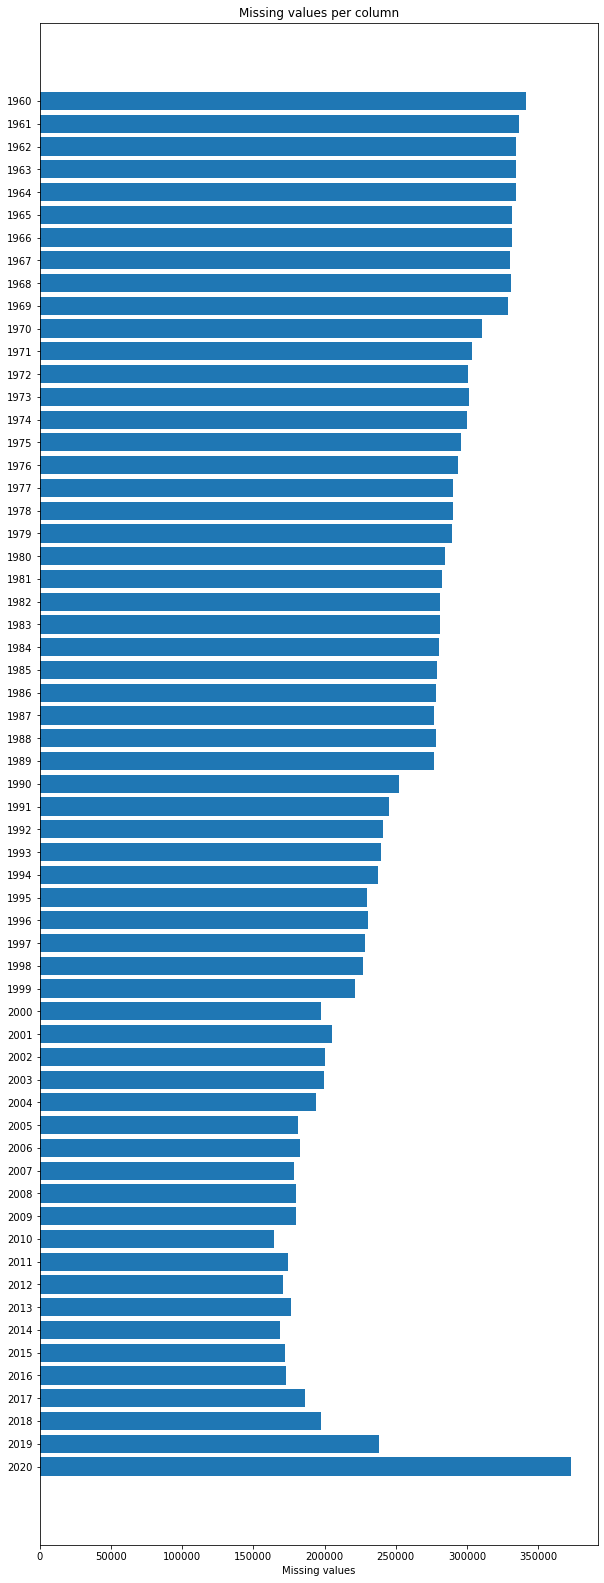

In [45]:
fig, ax = plt.subplots()

y_pos = np.arange(len(nan))
plt.rcParams["figure.figsize"] = (10,28)

ax.barh(y_pos, nan, align='center')

ax.set_yticks(y_pos)
ax.set_yticklabels(df.columns[4:-1])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Missing values')
ax.set_title('Missing values per column')
plt.savefig('MissingValues.svg', format='svg')

In [30]:
df.columns[:-1]

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object')

In [48]:
len(df['Country Name'].unique())

264

In [50]:
nan_all = df.isna().sum().values
sum(nan_all)

15933432

In [51]:
nan_country = dict()
for country in list(df['Country Name'].unique()):
    df_country = df[df["Country Name"] == country]
    nan_per_country = sum(df_country.isna().sum().values)
    nan_country[country] = nan_per_country = sum(df_country.isna().sum().values)
nan_country

{'Arab World': 63868,
 'Caribbean small states': 64653,
 'Central Europe and the Baltics': 64367,
 'Early-demographic dividend': 60063,
 'East Asia & Pacific': 60385,
 'East Asia & Pacific (excluding high income)': 58661,
 'East Asia & Pacific (IDA & IBRD countries)': 63031,
 'Euro area': 60145,
 'Europe & Central Asia': 58415,
 'Europe & Central Asia (excluding high income)': 60490,
 'Europe & Central Asia (IDA & IBRD countries)': 64399,
 'European Union': 59718,
 'Fragile and conflict affected situations': 63987,
 'Heavily indebted poor countries (HIPC)': 63035,
 'High income': 57559,
 'IBRD only': 61913,
 'IDA & IBRD total': 62239,
 'IDA blend': 62760,
 'IDA only': 63623,
 'IDA total': 63695,
 'Late-demographic dividend': 63140,
 'Latin America & Caribbean': 56355,
 'Latin America & Caribbean (excluding high income)': 54727,
 'Latin America & the Caribbean (IDA & IBRD countries)': 59166,
 'Least developed countries: UN classification': 64211,
 'Low & middle income': 57543,
 'Low inc

In [54]:
nan_country_sorted = sorted(nan_country.items(), key=lambda x: x[1], reverse=True)    
print(nan_country_sorted)

[('Not classified', 88908), ('St. Martin (French part)', 88004), ('Sint Maarten (Dutch part)', 85994), ('Isle of Man', 85963), ('Northern Mariana Islands', 85234), ('American Samoa', 83873), ('Monaco', 83849), ('Turks and Caicos Islands', 83292), ('British Virgin Islands', 83191), ('Gibraltar', 83190), ('Liechtenstein', 83093), ('Andorra', 82271), ('Cayman Islands', 82108), ('Faroe Islands', 81946), ('Channel Islands', 81478), ('San Marino', 81231), ('Nauru', 81155), ('Curacao', 80703), ('Kosovo', 80673), ('Greenland', 80551), ('Tuvalu', 79821), ('Virgin Islands (U.S.)', 79142), ('Palau', 78398), ('Guam', 78093), ('Marshall Islands', 77295), ('Bermuda', 77273), ('South Sudan', 77091), ('French Polynesia', 75329), ('New Caledonia', 74762), ('Korea, Dem. People’s Rep.', 74383), ('Micronesia, Fed. Sts.', 74119), ('Aruba', 73027), ('Turkmenistan', 71520), ('Puerto Rico', 70694), ('St. Kitts and Nevis', 70553), ('Montenegro', 70424), ('Timor-Leste', 68825), ('Dominica', 68630), ('West Bank 

In [56]:
nan_country_sorted[:20]

[('Not classified', 88908),
 ('St. Martin (French part)', 88004),
 ('Sint Maarten (Dutch part)', 85994),
 ('Isle of Man', 85963),
 ('Northern Mariana Islands', 85234),
 ('American Samoa', 83873),
 ('Monaco', 83849),
 ('Turks and Caicos Islands', 83292),
 ('British Virgin Islands', 83191),
 ('Gibraltar', 83190),
 ('Liechtenstein', 83093),
 ('Andorra', 82271),
 ('Cayman Islands', 82108),
 ('Faroe Islands', 81946),
 ('Channel Islands', 81478),
 ('San Marino', 81231),
 ('Nauru', 81155),
 ('Curacao', 80703),
 ('Kosovo', 80673),
 ('Greenland', 80551)]

TypeError: 'value' must be an instance of str or bytes, not a numpy.int64

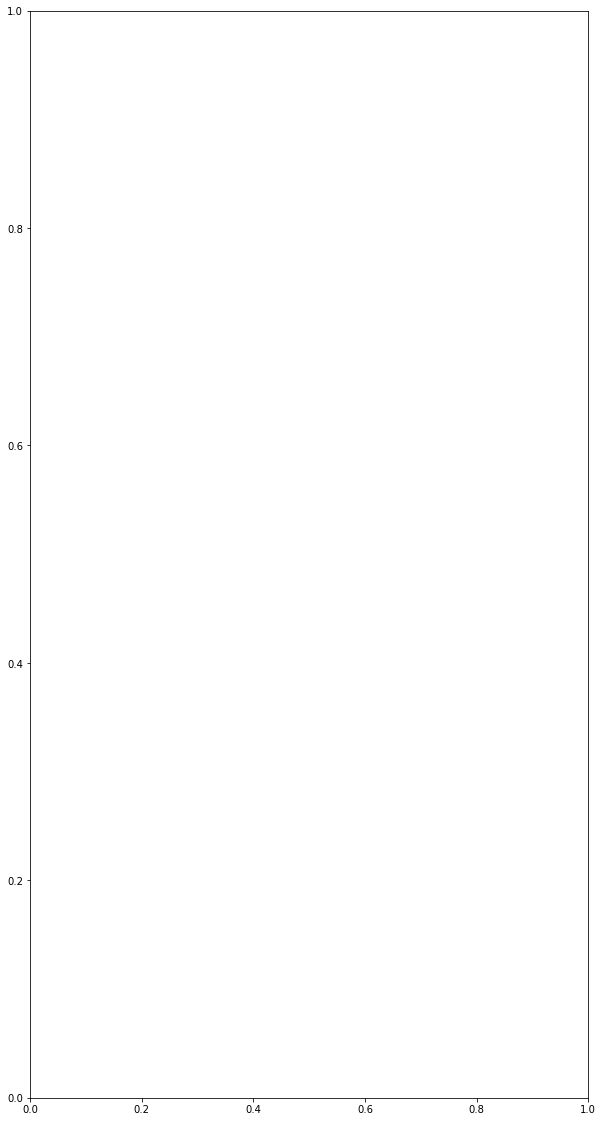

In [59]:
pfig, ax = plt.subplots()

y_pos = np.arange(len(nan_country_sorted))
plt.rcParams["figure.figsize"] = (10,20)

ax.barh(y_pos, nan_country_sorted[:][1], align='center')

ax.set_yticks(y_pos)
ax.set_yticklabels(nan_country_sorted[:][0])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Missing values')
ax.set_title('Missing values per column')
plt.savefig('MissingValues.svg', format='svg')

TypeError: list indices must be integers or slices, not tuple

In [66]:
df_fin = pd.read_csv('preprocessed_normalized_data.csv', index_col=0)
df_fin.head()

,Country Name,Indicator Name,1989,1990,1991,1992,1993,1994,1995,1996,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Algeria,Adjusted net national income (constant 2010 US$),2.052023e+06,2.012271e+06,1.975446e+06,1.908694e+06,1.729186e+06,1.689777e+06,1.661869e+06,1.643927e+06,...,3.401323e+06,3.396150e+06,3.589790e+06,3.548539e+06,3.503132e+06,3.325664e+06,3.495184e+06,3.490920e+06,3.423912e+06,NaN
1,Algeria,Age dependency ratio (% of working-age populat...,8.952999e+01,8.764613e+01,8.577588e+01,8.375662e+01,8.157296e+01,7.918647e+01,7.658746e+01,7.406596e+01,...,4.867454e+01,4.921309e+01,4.977822e+01,5.049722e+01,5.150919e+01,5.283779e+01,5.418401e+01,5.580400e+01,5.750803e+01,5.899049e+01
2,Algeria,Agricultural land (sq. km),1.627382e-01,1.623855e-01,1.621588e-01,1.631790e-01,1.631664e-01,1.664329e-01,1.664707e-01,1.664161e-01,...,1.737133e-01,1.737721e-01,1.738149e-01,1.739553e-01,1.739527e-01,1.740593e-01,1.736554e-01,NaN,NaN,NaN
3,Algeria,Consumer price index (2010 = 100),1.330392e+01,1.551936e+01,1.953677e+01,2.572399e+01,3.100779e+01,4.001482e+01,5.193109e+01,6.163133e+01,...,1.000000e+02,1.045242e+02,1.138179e+02,1.175218e+02,1.209499e+02,1.267366e+02,1.348449e+02,1.423842e+02,1.484640e+02,1.513617e+02
4,Algeria,Exports of goods and services (constant 2010 US$),1.754021e+06,1.767704e+06,1.709221e+06,1.734628e+06,1.664282e+06,1.574746e+06,1.642288e+06,1.734778e+06,...,1.722062e+06,1.638994e+06,1.546543e+06,1.429473e+06,1.403499e+06,1.381959e+06,1.448672e+06,1.332768e+06,1.257948e+06,1.158589e+06


In [67]:
len(list(df_fin['Country Name'].unique()))

94

In [68]:
df_fin.shape

(1222, 33)

In [69]:
sum(df_fin.isna().sum().values)

1043